In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# import our own acquire module

import os
import acquire
import env
import prepare

In [58]:
df = sns.load_dataset('iris')


# # 4

# print the first 3 rows

In [3]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


# print the number of rows and columns (shape)

In [4]:
df.shape

(150, 5)

# print the column names

In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# print the summary statistics for each of the numeric variables

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


# # 5

# Read the data from this google sheet into a dataframe, df_google.

In [7]:
sheet_url =

SyntaxError: invalid syntax (4252266865.py, line 1)

In [ ]:
cvs_export_url =

In [ ]:
df_googlesheet = pd.read_csv('train.csv')

# print the first 3 rows

In [ ]:
df_googlesheet.head(3)

# print the number of rows and columns

In [ ]:
df_googlesheet.shape

# print the column names

In [ ]:
df_googlesheet.columns

# print the data type of each column

In [ ]:
df_googlesheet.dtypes

# print the summary statistics for each of the numeric variables


In [ ]:
df_googlesheet.describe()

# print the unique values for each of your categorical variables

In [ ]:
df_googlesheet.nunique()

# # 6

# Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.


In [ ]:
df_excel = pd.read_excel('train.xlsx',sheet_name = 'train')

In [ ]:

df_excel.head()

# assign the first 100 rows to a new dataframe, df_excel_sample

In [ ]:
df_excel_sample = pd.DataFrame(df_excel.head(100))
df_excel_sample

# print the number of rows of your original dataframe

In [ ]:
len(df_excel.index)

# print the first 5 column names

In [ ]:
five_name = df_excel_sample.iloc[: , :5].columns

In [ ]:
five_name

# print the column names that have a data type of object

In [ ]:
df_excel_sample.dtypes == object

In [ ]:
df_excel_sample.select_dtypes(include=['object']).columns

# compute the range for each of the numeric variables.

In [ ]:
df_excel_sample.dtypes

In [ ]:
num = df_excel_sample.select_dtypes(include=(['int64','float64']))

In [ ]:
num = num.astype('float64')


In [ ]:
num['PassengerId'].max() - num['PassengerId'].min()

In [ ]:
num['Survived'].max() - num['Survived'].min()

In [ ]:
num['Pclass'].max() - num['Pclass'].min()

In [ ]:
num['Age'].max() - num['Age'].min()

In [92]:
num['SibSp'].max() - num['SibSp'].min()

NameError: name 'num' is not defined

In [ ]:
num['Parch'].max() - num['Parch'].min()

In [ ]:
num['Fare'].max() - num['Fare'].min()

# Data Preparation

# iris

In [145]:
iris = acquire.get_iris_data(acquire.get_connection)

In [98]:
iris = iris.drop(columns=['Unnamed: 0'])

In [121]:
iris.head()

,Unnamed: 0,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,1,2,4.9,3.0,1.4,0.2,setosa
2,2,1,3,4.7,3.2,1.3,0.2,setosa
3,3,1,4,4.6,3.1,1.5,0.2,setosa
4,4,1,5,5.0,3.6,1.4,0.2,setosa


# Drop the species_id and measurement_id columns.

In [100]:
iris = iris.drop(columns=['species_id','measurement_id'])

# Rename the species_name column to just species.m

In [101]:
iris = iris.rename(columns={"species_name": "name"})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [104]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
name            0
dtype: int64

In [105]:
spec_name_df = pd.get_dummies(iris[['name']], dummy_na=False)
spec_name_df

,name_setosa,name_versicolor,name_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [106]:
iris = pd.concat([iris, spec_name_df ], axis=1)
iris


,sepal_length,sepal_width,petal_length,petal_width,name,name_setosa,name_versicolor,name_virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0,0,1
146,6.3,2.5,5.0,1.9,virginica,0,0,1
147,6.5,3.0,5.2,2.0,virginica,0,0,1
148,6.2,3.4,5.4,2.3,virginica,0,0,1


# Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [483]:
iris = acquire.get_iris_data(acquire.get_connection)

In [77]:
def prep_iris(df):
    '''
    take in presupposed version of iris bases on acquire.py and make appropriate changes.
    
    positional arg : uncleaned iris
    return: cleaned iris
    '''
    
    
    df = df.drop(columns=['Unnamed: 0'])
    
    df = df.drop(columns=['species_id','measurement_id'])
    
    df = df.rename(columns={"species_name": "species"})
    
    spec_name_df = pd.get_dummies(df[['species']], dummy_na=False, drop_first =True)
    
    df = pd.concat([df, spec_name_df ], axis=1)
    
    return df
    
        

    


In [76]:
clean_iris = prep_iris(iris)


In [486]:
clean_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


# Using the Titanic dataset

In [18]:
df = acquire.get_titanic_data(acquire.get_connection)

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.head(1)

# Drop any unnecessary, unhelpful, or duplicated columns.

In [ ]:
df = df.drop_duplicates()
df.shape

In [ ]:
cols_to_drop = ['deck', 'embarked', 'class', 'age']
df = df.drop(columns=cols_to_drop)

In [ ]:

missing = df.isnull().sum()
missing[missing > 0]

In [ ]:
df['embark_town'] = df.embark_town.fillna(value='Southampton')

# Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [ ]:
obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
for col in obj_cols:
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True, dropna=False))
    print('----------------------')

In [ ]:
dummy_df = pd.get_dummies(df[['sex','embark_town']], dummy_na=False)
dummy_df

In [ ]:
df = pd.concat([df, dummy_df], axis=1)

In [ ]:
df.head

# Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [142]:
df = acquire.get_titanic_data(acquire.get_connection)

In [23]:
def prep_titanic(df):
    
    df = df.drop(columns=['Unnamed: 0'])
    
    df = df.drop_duplicates()
    
    cols_to_drop = ['deck', 'embarked', 'class', 'age','passenger_id']
    df = df.drop(columns=cols_to_drop)
    
    df['embark_town'] = df.embark_town.fillna(value='Southampton')
    
    dummy_df = pd.get_dummies(df[['sex','embark_town']], dummy_na=False, drop_first = True)
    
    df = pd.concat([df, dummy_df], axis=1)  
    
    return df
    

In [24]:
clean_titanic = prep_titanic(df)


In [144]:
clean_titanic.head(1)


,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.25,Southampton,0,1,0,1


# Using the Telco dataset

# Use the function defined in acquire.py to load the Telco data.

In [27]:
df = acquire.get_telco_data(acquire.get_connection)

# Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df = df.drop_duplicates()
df.head()

In [ ]:
cols_to_drop = ['payment_type_id', 'internet_service_type_id', 'contract_type_id']


In [ ]:
df = df.drop(columns=cols_to_drop)


# Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [ ]:
cat_cols = df.select_dtypes(include = object).columns.to_list()
cat_cols

In [ ]:
dummy_df = pd.get_dummies(df[[
 'gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']], dummy_na=False,drop_first=[True, True])
dummy_df

# Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.


In [150]:
df.head()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [407]:
df = acquire.get_telco_data(acquire.get_connection)

In [7]:
def prep_telco(df):
    
    df = df.drop(columns=['Unnamed: 0'])
    
    
    df = df.drop_duplicates()
    
    cols_to_drop = ['payment_type_id', 'internet_service_type_id', 'contract_type_id']
    df = df.drop(columns=cols_to_drop)
    
  
    dummy_df = pd.get_dummies(df[[
     'gender',
     
     'partner',
     'dependents',
     'phone_service',
     'multiple_lines',
     'online_security',
     'online_backup',
     'device_protection',
     'tech_support',
     'streaming_tv',
     'streaming_movies',
     'paperless_billing',
     'churn',
     'contract_type',
     'internet_service_type',
     'payment_type']], dummy_na=False,drop_first = True )
    
    df = pd.concat([df, dummy_df], axis=1)  
    
    return df

In [8]:
clean_telco = prep_telco(df)

In [410]:
df = df.replace(' ',0)

In [388]:
df.dtypes

Unnamed: 0                    int64
payment_type_id               int64
internet_service_type_id      int64
contract_type_id              int64
customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
paperless_billing            object
monthly_charges             float64
total_charges                object
churn                        object
contract_type                object
internet_service_type        object
payment_type                 object
dtype: object

In [411]:
df['total_charges'].astype('float')

0        593.30
1        542.40
2        280.85
3       1237.85
4        267.40
         ...   
7038     742.90
7039    1873.70
7040      92.75
7041    4627.65
7042    3707.60
Name: total_charges, Length: 7043, dtype: float64

In [187]:
pd.set_option('display.max_columns', None)


In [ ]:
df.head(2)

# 2

Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.

In [131]:
clean_iris

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0,1
146,6.3,2.5,5.0,1.9,virginica,0,1
147,6.5,3.0,5.2,2.0,virginica,0,1
148,6.2,3.4,5.4,2.3,virginica,0,1


In [489]:
train,validate,test= prepare.split_data(clean_iris,'species')

In [490]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (84, 7)
validate -> (36, 7)
test -> (30, 7)


# 3

In [23]:
clean_titanic.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,0,1,0,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,1,0,1,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,1,0,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,1,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,0,1,0,0,1


In [24]:
train2,validate2,test2= prepare.split_data(clean_titanic,'survived')

In [25]:
print(f'train -> {train2.shape}')
print(f'validate -> {validate2.shape}')
print(f'test -> {test2.shape}')

train -> (498, 14)
validate -> (214, 14)
test -> (179, 14)


# 4

In [183]:
clean_telco

NameError: name 'clean_telco' is not defined

In [33]:
train3,validate3,test3= prepare.split_data(clean_telco,"churn")

In [34]:
print(f'train -> {train3.shape}')
print(f'validate -> {validate3.shape}')
print(f'test -> {test3.shape}')

train -> (3943, 48)
validate -> (1691, 48)
test -> (1409, 48)


# Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

# part 1

# # Acquire, prepare & split your data.

In [79]:
iris = acquire.get_iris_data(acquire.get_connection)

In [80]:
clean_iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0


In [89]:
clean_iris = prep_iris(iris)

In [90]:
train,validate,test = prepare.split_data(clean_iris,'species')


# # Univariate Stats

# For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [85]:
train.describe()

NameError: name 'train' is not defined

In [25]:
train.dtypes

sepal_length          float64
sepal_width           float64
petal_length          float64
petal_width           float64
species                object
species_versicolor      uint8
species_virginica       uint8
dtype: object

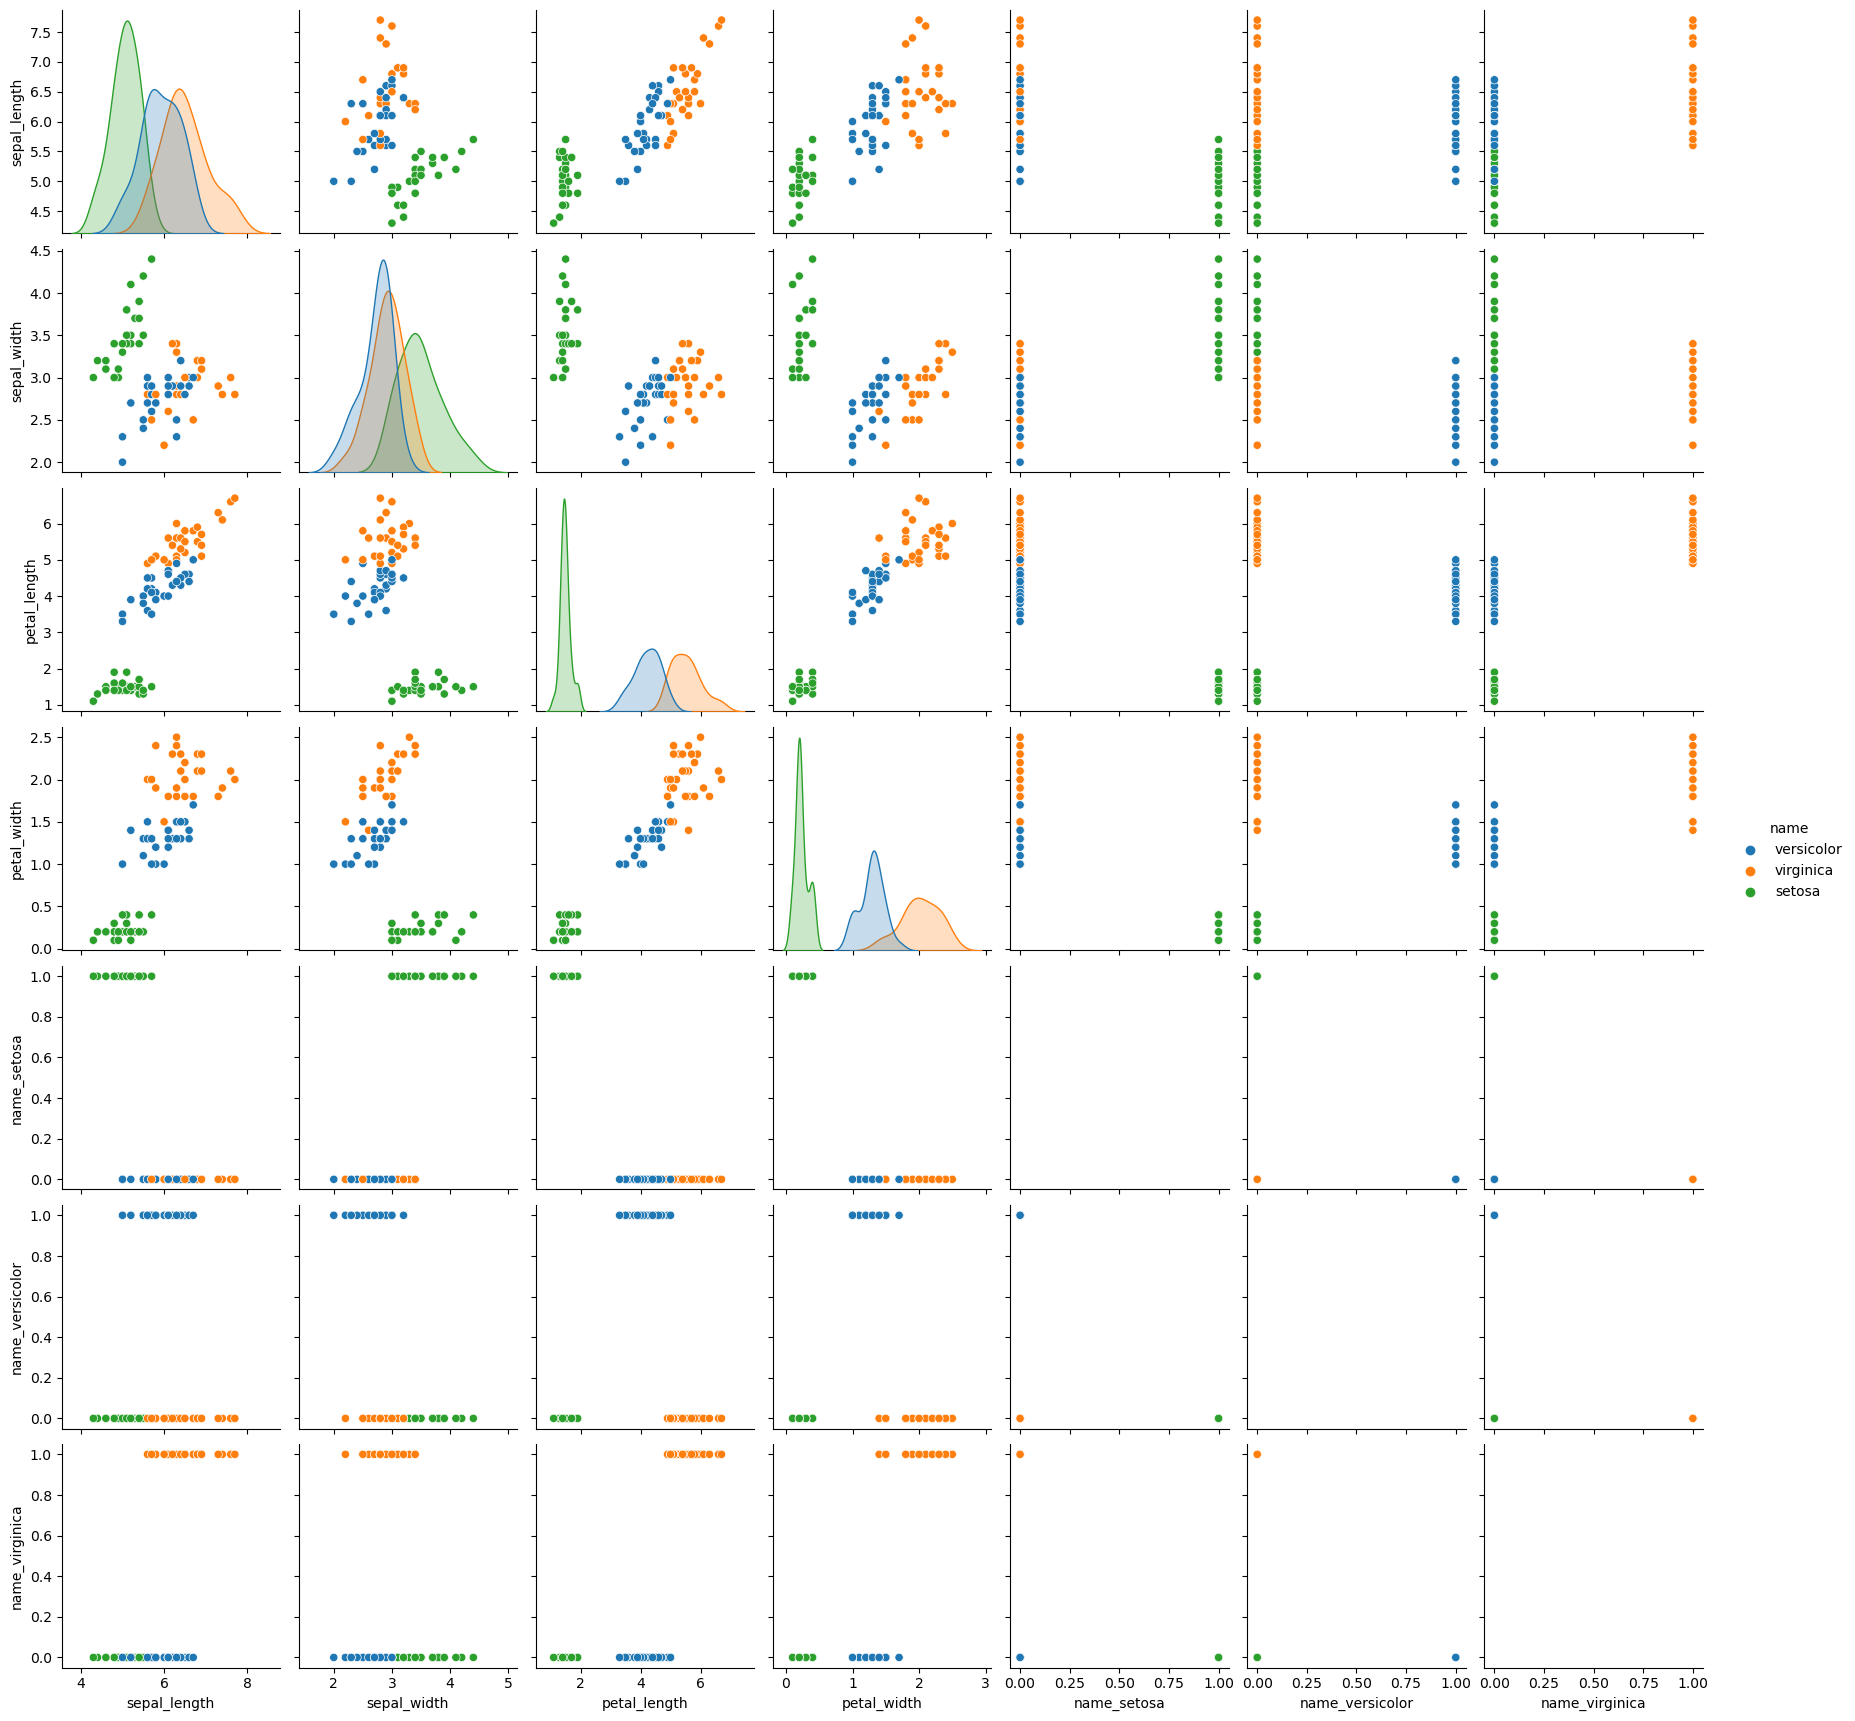

In [164]:
sns.pairplot(train,hue='name')


# create a histogram, boxplot, & compute descriptive statistics (

In [501]:
# setting numeric columns

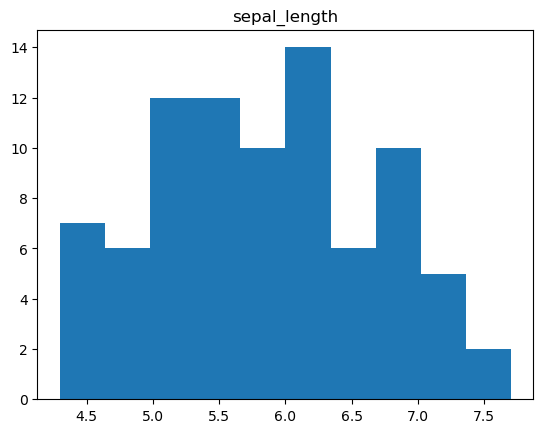

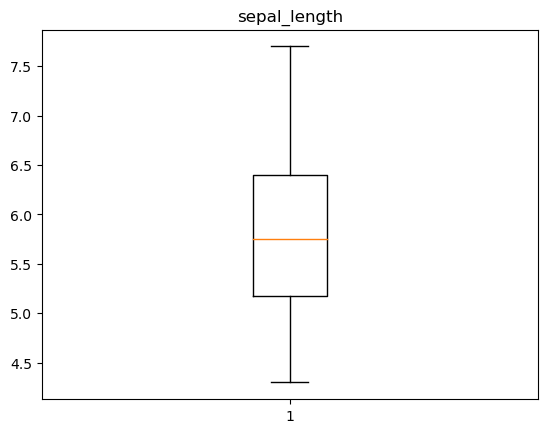

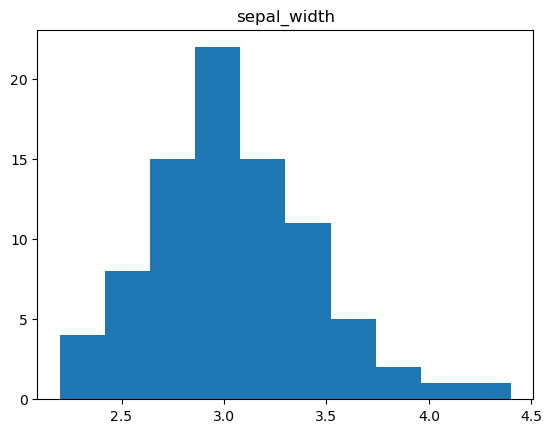

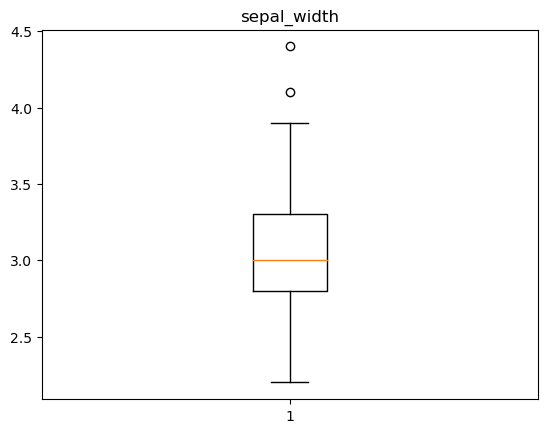

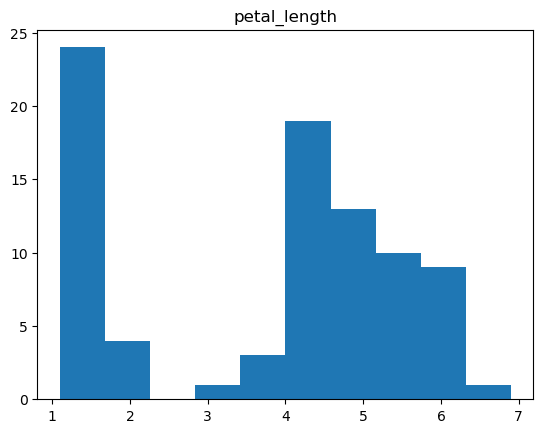

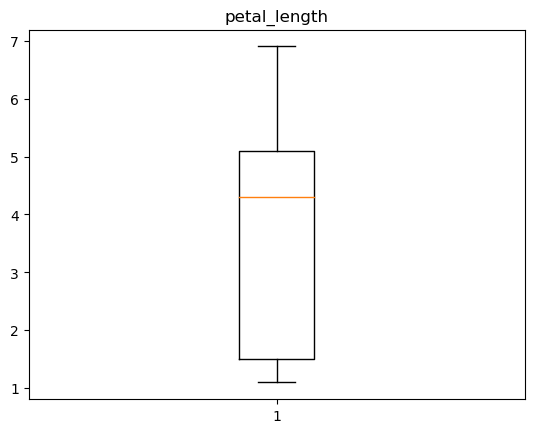

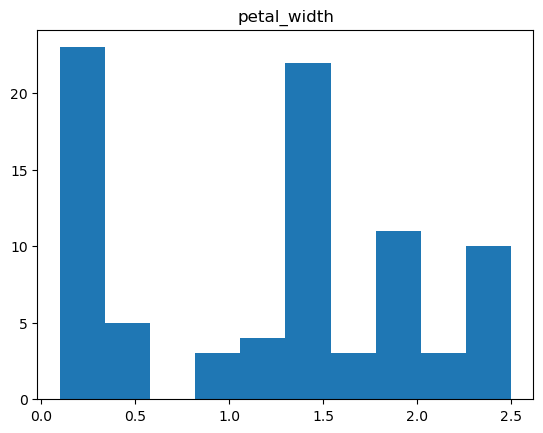

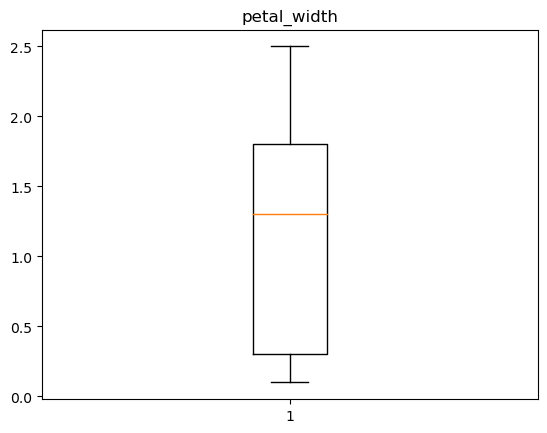

In [22]:
num_cols = train.columns[[train[col].dtype == 'float64' for col in train.columns]]
for col in num_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()


In [27]:
# i need to find out how to describe boxplots to others
#for col in num_vars:
#    print(col)
#    sns.boxplot(x=xol,data = train)

# For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [182]:
cat_cols = train.select_dtypes(include = object).columns.to_list()

In [183]:
cat_cols

['name']

# species freq table

In [192]:
pd.crosstab(index=train['name'], columns='count')

col_0,count
name,
setosa,28
versicolor,28
virginica,28


# Document takeaways & any actions.

In [196]:
# Looking at the species, we have an equal amount for all samples.
# Sepal length show some connections between species and length
# Petal width and length show great promise in being able to distinguish species types, take a further look
# setosa having a smaller ( in relation to data) petal overall
#
#
#
#


# # Bivariate Stats

# Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

# species and sepal length

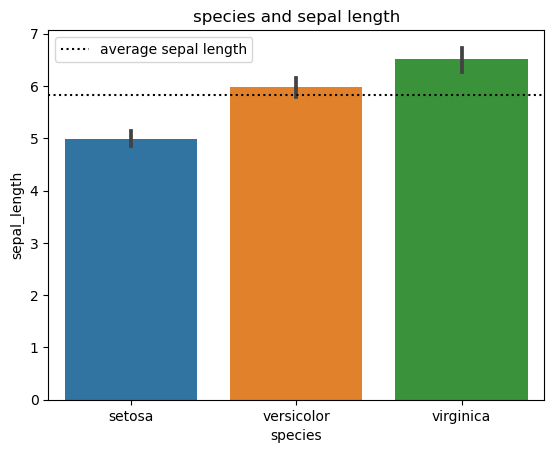

In [31]:
plt.title("species and sepal length")

sns.barplot(x="species", y="sepal_length", data=train)

mean_sepal_length = train.sepal_length.mean()

plt.axhline(mean_sepal_length, label="average sepal length", color='black', linestyle='dotted')

plt.legend()
plt.show()


# sepal and sepal width

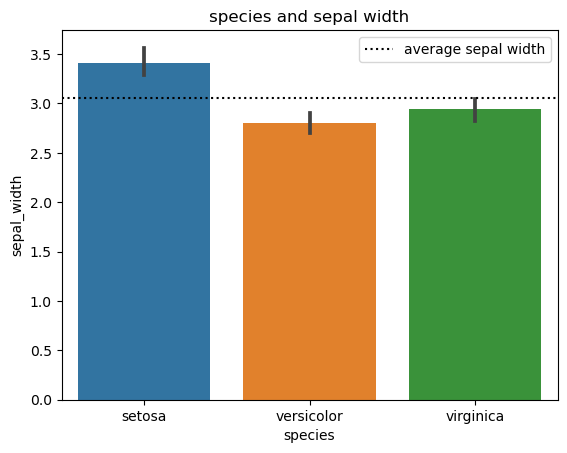

In [34]:
plt.title("species and sepal width")

sns.barplot(x="species", y="sepal_width", data=train)

mean_sepal_width = train.sepal_width.mean()

plt.axhline(mean_sepal_width, label="average sepal width", color='black', linestyle='dotted')

plt.legend()


# petal length and width

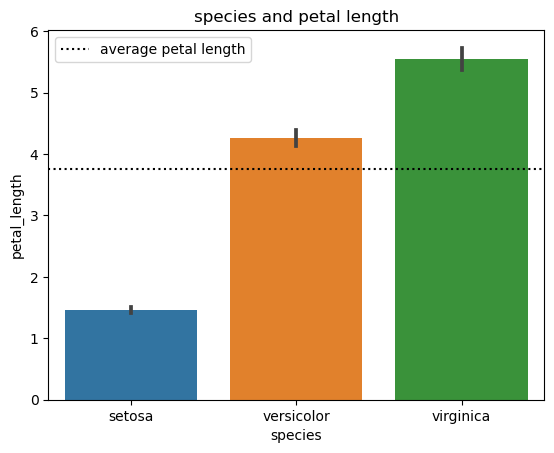

In [36]:
plt.title("species and petal length")

sns.barplot(x="species", y="petal_length", data=train)

mean_petal_length = train.petal_length.mean()

plt.axhline(mean_petal_length, label="average petal length", color='black', linestyle='dotted')

plt.legend()

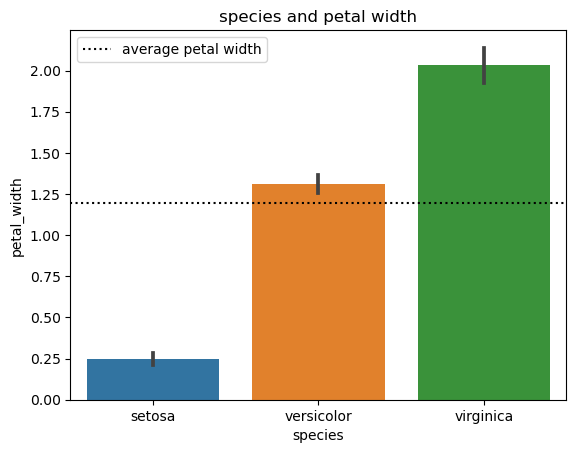

In [37]:
plt.title("species and petal width")

sns.barplot(x="species", y="petal_width", data=train)

mean_petal_width = train.petal_width.mean()

plt.axhline(mean_petal_width, label="average petal width", color='black', linestyle='dotted')

plt.legend()

# For each measurement type, compute the descriptive statistics for each species.

# Setosa

In [45]:
train[train.species == 'setosa'].sepal_length.describe()

count    28.000000
mean      4.992857
std       0.388662
min       4.300000
25%       4.750000
50%       5.000000
75%       5.225000
max       5.700000
Name: sepal_length, dtype: float64

In [47]:
setosa_sl = pd.DataFrame(train[train.species == 'setosa'].sepal_length.describe())
setosa_sw = pd.DataFrame(train[train.species == 'setosa'].sepal_width.describe())
setosa_pl = pd.DataFrame(train[train.species == 'setosa'].petal_length.describe())
setosa_pw = pd.DataFrame(train[train.species == 'setosa'].petal_width.describe())

setosa_describe = pd.concat([setosa_sl, setosa_sw], axis=1)
setosa_describe = pd.concat([setosa_describe, setosa_pl], axis=1)
setosa_describe = pd.concat([setosa_describe, setosa_pw], axis=1)
setosa_describe

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,4.992857,3.414286,1.460714,0.246429
std,0.388662,0.363842,0.157149,0.099934
min,4.300000,2.900000,1.100000,0.100000
25%,4.750000,3.100000,1.400000,0.200000
50%,5.000000,3.400000,1.400000,0.200000
75%,5.225000,3.625000,1.500000,0.300000
max,5.700000,4.400000,1.900000,0.500000


# versicolor

In [49]:
versicolor_sl = pd.DataFrame(train[train.species == 'versicolor'].sepal_length.describe())
versicolor_sw = pd.DataFrame(train[train.species == 'versicolor'].sepal_width.describe())
versicolor_pl = pd.DataFrame(train[train.species == 'versicolor'].petal_length.describe())
versicolor_pw = pd.DataFrame(train[train.species == 'versicolor'].petal_width.describe())

versicolor_describe = pd.concat([versicolor_sl, versicolor_sw], axis=1)
versicolor_describe = pd.concat([versicolor_describe, versicolor_pl], axis=1)
versicolor_describe = pd.concat([versicolor_describe, versicolor_pw], axis=1)
versicolor_describe

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,5.971429,2.803571,4.264286,1.310714
std,0.502481,0.291207,0.371398,0.154774
min,5.000000,2.200000,3.300000,1.000000
25%,5.600000,2.600000,4.000000,1.275000
50%,5.900000,2.800000,4.300000,1.300000
75%,6.325000,3.000000,4.500000,1.400000
max,7.000000,3.400000,4.900000,1.600000


# Virginica descriptive statistics

In [50]:
virginica_sl = pd.DataFrame(train[train.species == 'virginica'].sepal_length.describe())
virginicac_sw = pd.DataFrame(train[train.species == 'virginica'].sepal_width.describe())
virginicac_pl = pd.DataFrame(train[train.species == 'virginica'].petal_length.describe())
virginicac_pw = pd.DataFrame(train[train.species == 'virginica'].petal_width.describe())

virginica_describe = pd.concat([virginica_sl, virginica_describe_sw], axis=1)
virginica_describe = pd.concat([virginica_describe, virginica_describe_pl], axis=1)
virginica_describe = pd.concat([virginica_describe, virginica_describe_pw], axis=1)
virginica_describe

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,6.514286,2.939286,5.546429,2.035714
std,0.629353,0.314277,0.516743,0.304551
min,4.900000,2.200000,4.500000,1.500000
25%,6.175000,2.775000,5.100000,1.800000
50%,6.450000,2.950000,5.600000,2.000000
75%,6.950000,3.200000,5.900000,2.300000
max,7.700000,3.600000,6.900000,2.500000


# For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

# H_o = there is no significant difference between the to groups

# H_a = there is significant difference between the to groups

In [134]:
virginica = train[train.species == 'virginica']
versicolor = train[train.species == 'versicolor']
setosa = train[train.species == 'setosa']


In [64]:
comp_var = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [225]:
a = 0.05

In [226]:
t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, alternative="two-sided")
t, p


(774.0, 3.4673599983519424e-10)

# Document takeaways & any actions.

In [ ]:
# In regards to the mannwhitneyu, there seems to be a significant difference in petal width between virginica and versicolor

# Multivariate Stats

# Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

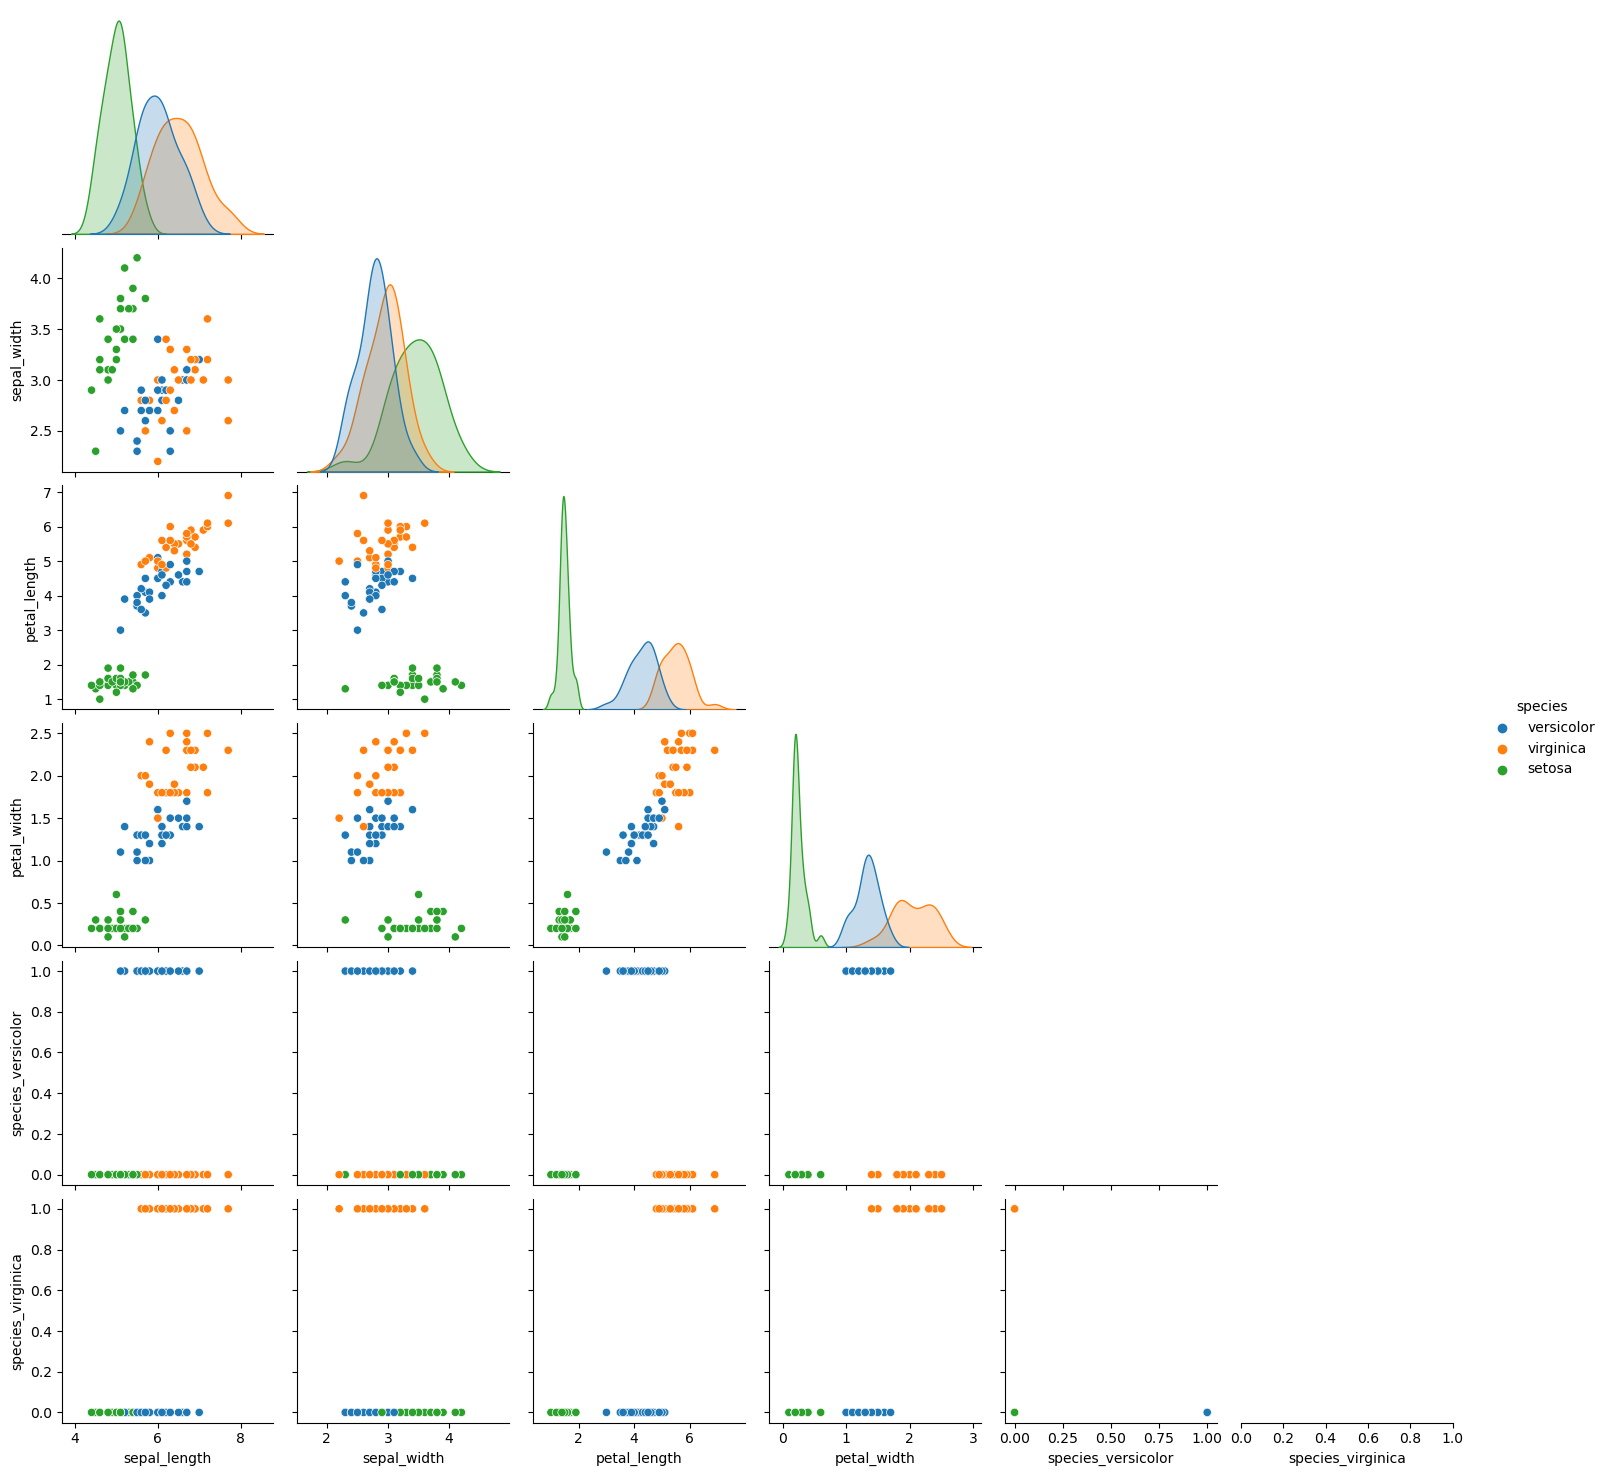

In [92]:
sns.pairplot(corner = True, data = train, hue = "species")

In [ ]:
# petal length and width show promise in distinguishinng between virginica and setosa
#


# Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

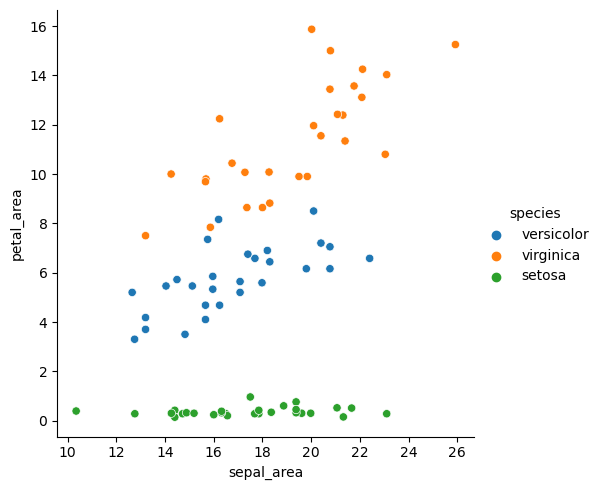

In [97]:
sns.relplot(data=train, x = "sepal_area",y = 'petal_area',hue = "species")

In [98]:
# added new feature to find sepal and petal area


# Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [109]:
train_melt = train.melt(id_vars=['species'],var_name= "measures",value_name = 'values')
train_melt

,species,measures,values
0,versicolor,sepal_length,6.60
1,virginica,sepal_length,7.10
2,virginica,sepal_length,5.60
3,setosa,sepal_length,4.80
4,setosa,sepal_length,5.10
...,...,...,...
667,versicolor,petal_area,4.68
668,setosa,petal_area,0.45
669,versicolor,petal_area,5.85
670,setosa,petal_area,0.28


/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 71.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 46.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 64.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: Us

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'sepal_length'),
  Text(1, 0, 'sepal_width'),
  Text(2, 0, 'petal_length'),
  Text(3, 0, 'petal_width'),
  Text(4, 0, 'species_versicolor'),
  Text(5, 0, 'species_virginica'),
  Text(6, 0, 'sepal_area'),
  Text(7, 0, 'petal_area')])

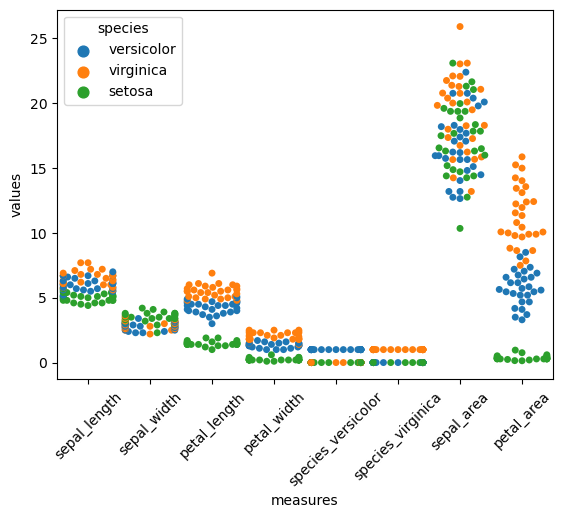

In [116]:
sns.swarmplot(data=train_melt, x='measures', y='values',hue='species')
plt.xticks(rotation =45)

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

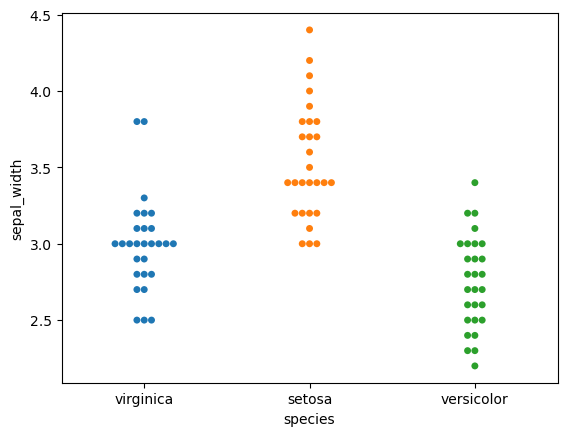

In [194]:
sns.swarmplot(data=train, x='species', y='sepal_width')

<AxesSubplot:xlabel='species', ylabel='petal_length'>

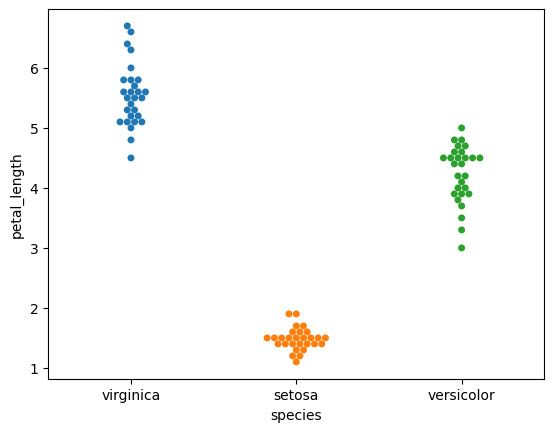

In [195]:
sns.swarmplot(data=train, x='species', y='petal_length')

<AxesSubplot:xlabel='species', ylabel='petal_width'>

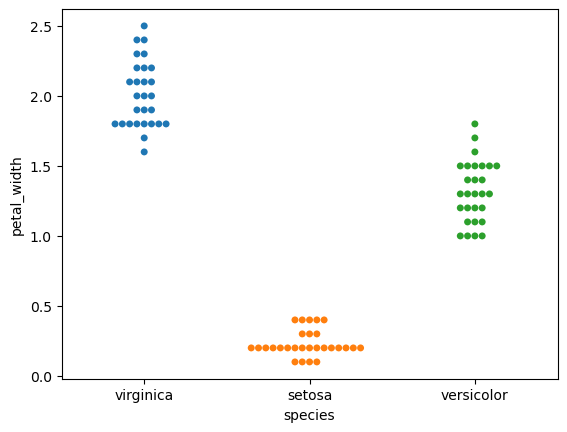

In [196]:
sns.swarmplot(data=train, x='species', y='petal_width')

In [201]:
num_cols = train.columns[[train[col].dtype == 'float64' for col in train.columns]]

# Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

In [94]:
x = train['sepal_area'] = train['sepal_length'] * train['sepal_width']

In [96]:
y = train['petal_area'] = train['petal_length'] * train['petal_width']



In [143]:
train.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica,sepal_area,petal_area
106,4.9,2.5,4.5,1.7,virginica,0,1,12.25,7.65
36,5.5,3.5,1.3,0.2,setosa,0,0,19.25,0.26


<AxesSubplot:>

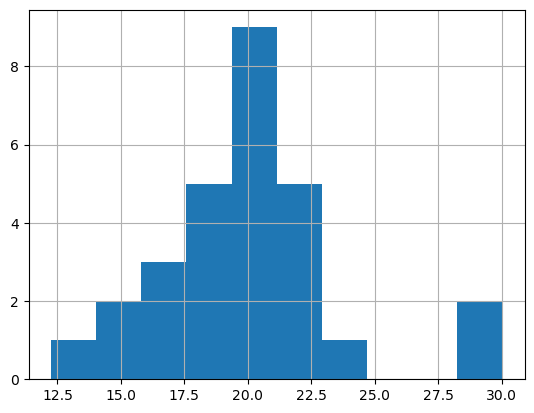

In [163]:
train_vir_area.sepal_area.hist()

In [165]:
x = train_set_area = train[train['species'] == 'setosa']

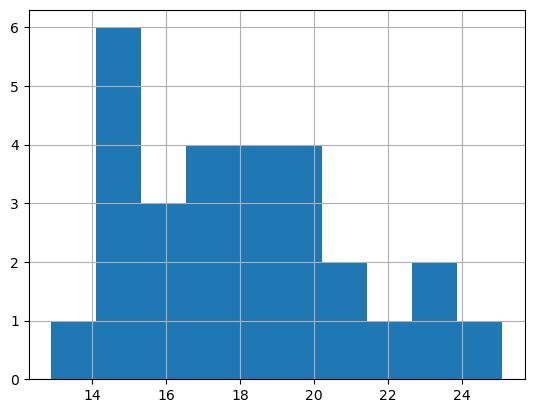

In [166]:
y = train_set_area.sepal_area.hist()

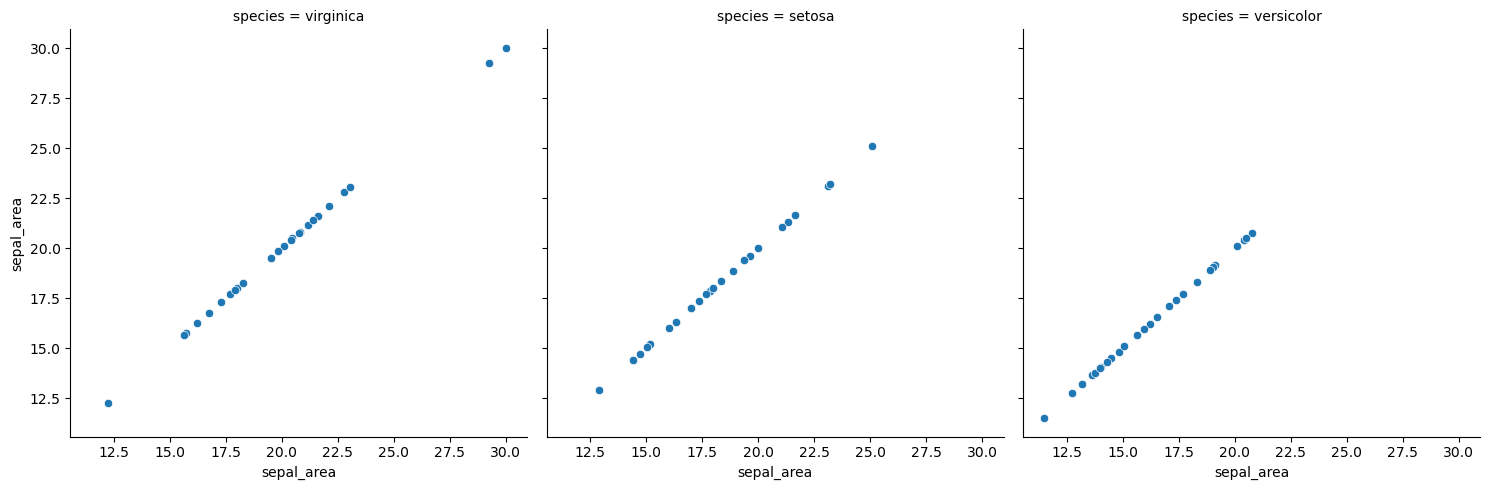

In [223]:
sns.relplot(data=train, x = "sepal_area",y = 'sepal_area',col = "species")


In [219]:
virginica.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica,sepal_area
106,4.9,2.5,4.5,1.7,virginica,0,1,12.25
119,6.0,2.2,5.0,1.5,virginica,0,1,NaN
102,7.1,3.0,5.9,2.1,virginica,0,1,NaN
141,6.9,3.1,5.1,2.3,virginica,0,1,NaN
116,6.5,3.0,5.5,1.8,virginica,0,1,19.50


In [220]:
virginica['sepal_area'] = virginica['sepal_length'] * virginica['sepal_width']
setosa['sepal_area'] = setosa['sepal_length'] * setosa['sepal_width']

In [221]:
t, p = stats.mannwhitneyu(virginica.sepal_area, setosa.sepal_area, alternative="two-sided")
t, p


(491.0, 0.10647505701248401)

In [222]:
if p < a :
    print('reject null hypothesis')
else:
    print("fail to reject")
    

fail to reject


# Document takeaways and any actions.

In [ ]:
# theres not a significant difference in area

# part 2

In [117]:
df = acquire.get_titanic_data(acquire.get_connection)

In [118]:
clean_titanic = prep_titanic(df)

In [119]:
train2,validate2,test2= prepare.split_data(clean_titanic,'survived')

In [ ]:
# target variable is survived

In [120]:
# i want no columnns dropped
train2.head(1)

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
494,0,3,male,0,0,8.05,Southampton,1,1,0,1


# Univariate

In [51]:
# numeric
#df.describe()
# series.hist()
# sns.boxplot()

,Unnamed: 0,passenger_id,survived,pclass,age,sibsp,parch,fare,alone
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694
std,257.353842,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615
min,0.000000,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,445.000000,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,667.500000,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [ ]:
# discrete
# series.value_counts()

In [52]:
train2.describe(include = 'all')

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
count,498.000000,498.000000,498,498.000000,498.000000,498.000000,498,498.000000,498.000000,498.000000,498.000000
unique,NaN,NaN,2,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,male,NaN,NaN,NaN,Southampton,NaN,NaN,NaN,NaN
freq,NaN,NaN,322,NaN,NaN,NaN,364,NaN,NaN,NaN,NaN
mean,0.383534,2.301205,NaN,0.552209,0.361446,31.706692,NaN,0.594378,0.646586,0.084337,0.730924
std,0.486735,0.842554,NaN,1.130466,0.743773,45.250979,NaN,0.491506,0.478510,0.278173,0.443926
min,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,0.000000,0.000000,7.895800,NaN,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,NaN,0.000000,0.000000,14.454200,NaN,1.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,NaN,1.000000,0.000000,31.387500,NaN,1.000000,1.000000,0.000000,1.000000


In [57]:
# cols that are discrete
disc_cols2 = train2.columns[[train2[col].dtype == 'object' for col in train2.columns]]

In [59]:
train2.dtypes

survived                     int64
pclass                       int64
sex                         object
sibsp                        int64
parch                        int64
fare                       float64
embark_town                 object
alone                        int64
sex_male                     uint8
embark_town_Queenstown       uint8
embark_town_Southampton      uint8
dtype: object

In [35]:
# cols that are numeric
num_cols2 = train2.columns[[train2[col].dtype != 'object' for col in train2.columns]] 

In [41]:
# loop through each numeric column and plot a histogram and boxplot 
# and compute descriptive stats. 

# but before doing that, make it work for one variable

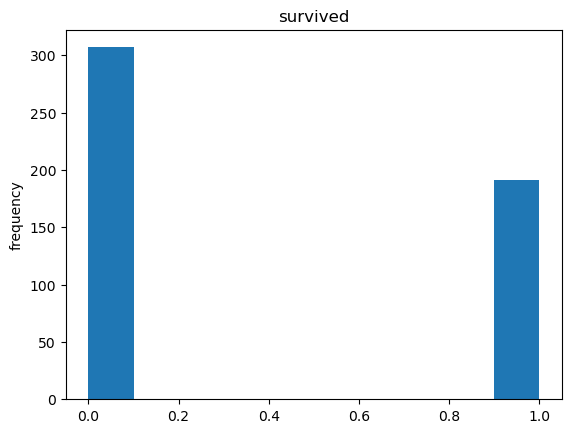

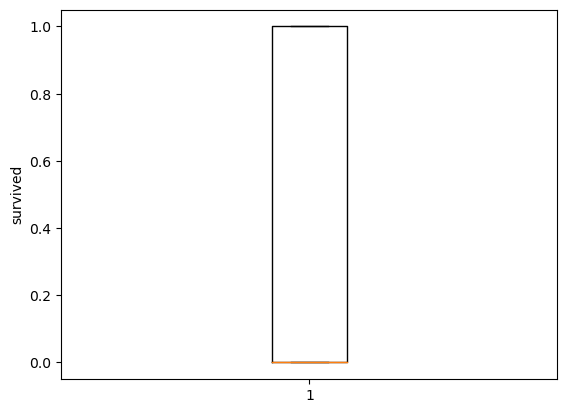

count    498.000000
mean       0.383534
std        0.486735
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: survived, dtype: float64


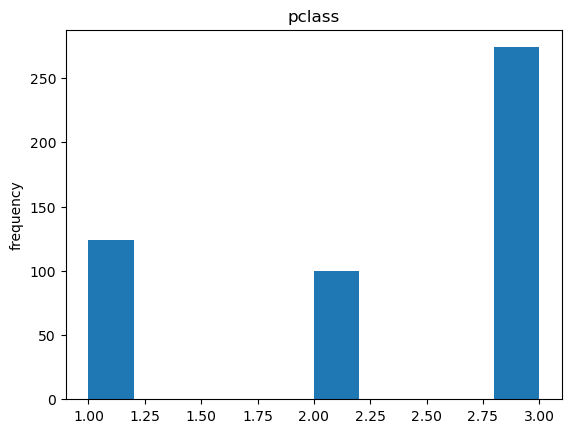

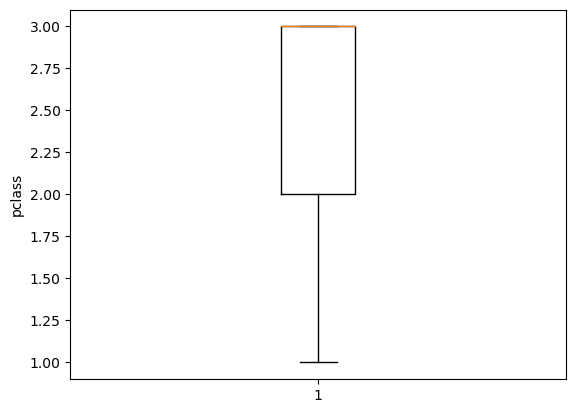

count    498.000000
mean       2.301205
std        0.842554
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: pclass, dtype: float64


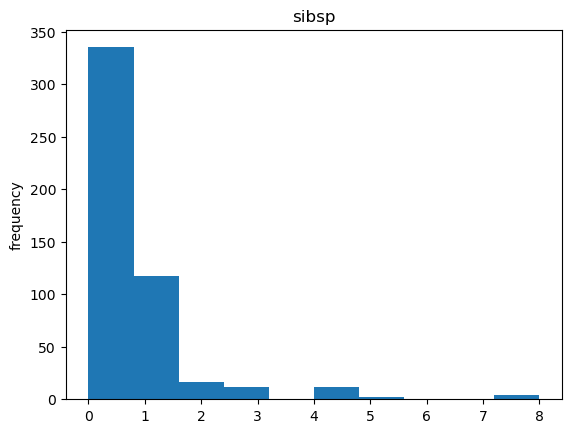

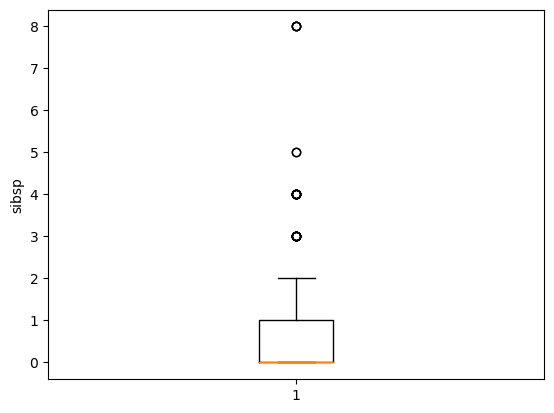

count    498.000000
mean       0.552209
std        1.130466
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: sibsp, dtype: float64


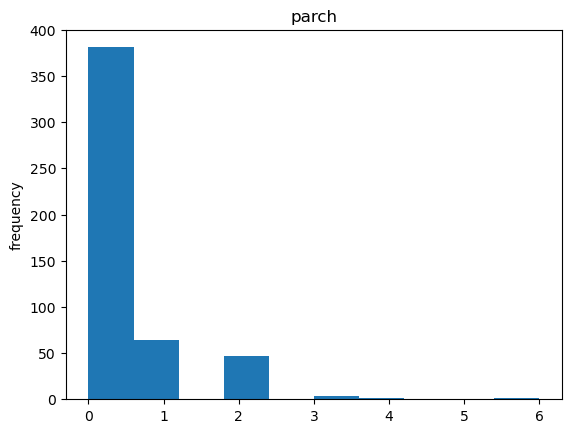

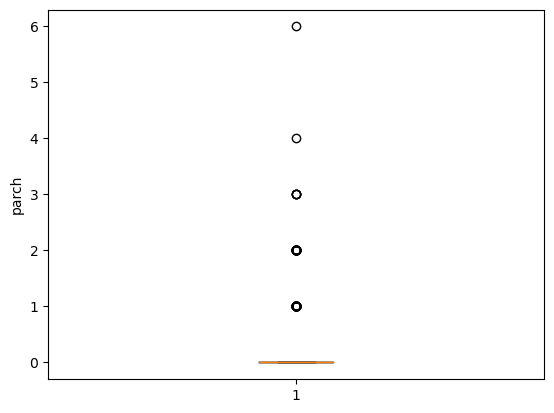

count    498.000000
mean       0.361446
std        0.743773
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: parch, dtype: float64


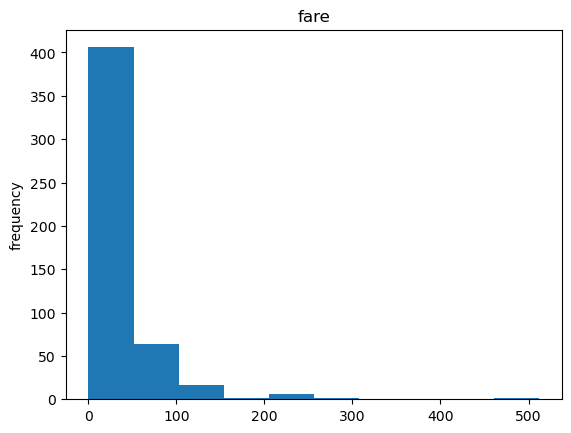

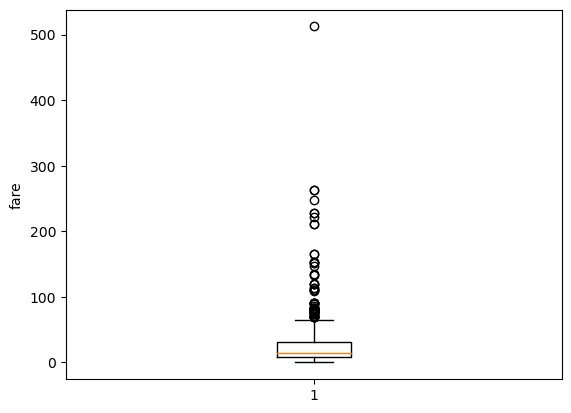

count    498.000000
mean      31.706692
std       45.250979
min        0.000000
25%        7.895800
50%       14.454200
75%       31.387500
max      512.329200
Name: fare, dtype: float64


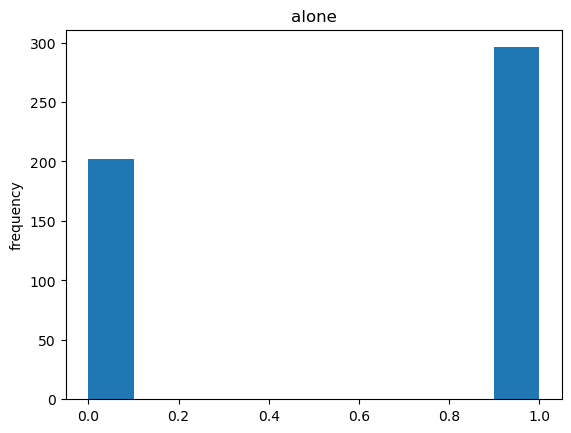

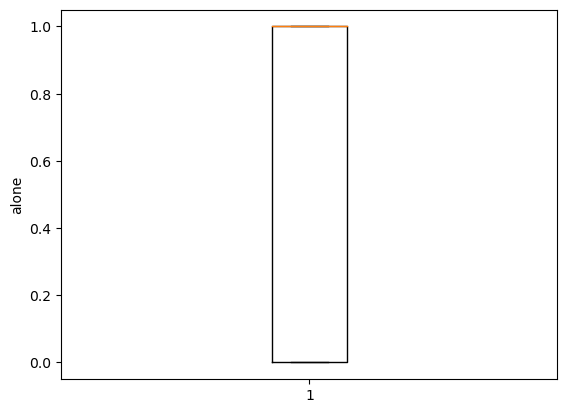

count    498.000000
mean       0.594378
std        0.491506
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: alone, dtype: float64


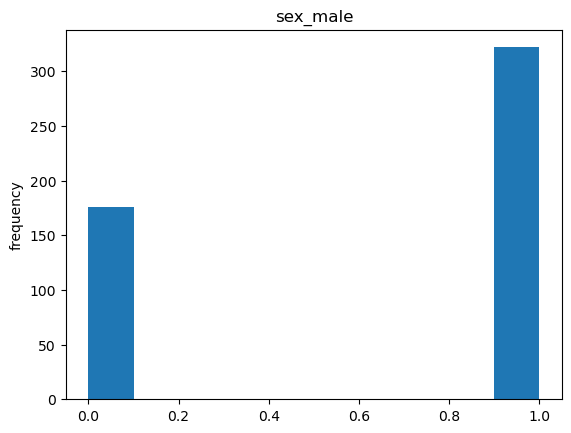

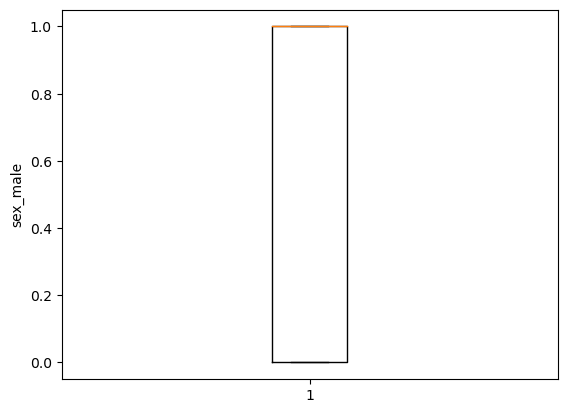

count    498.000000
mean       0.646586
std        0.478510
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex_male, dtype: float64


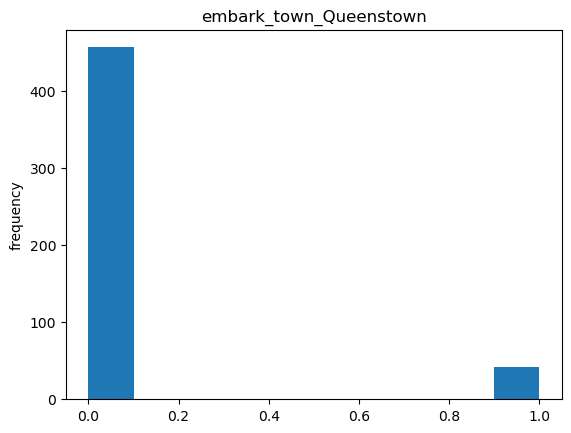

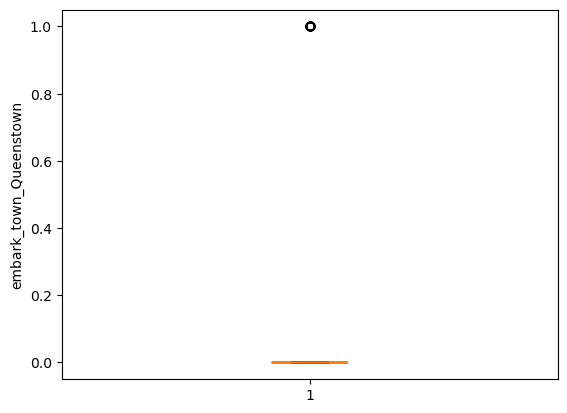

count    498.000000
mean       0.084337
std        0.278173
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: embark_town_Queenstown, dtype: float64


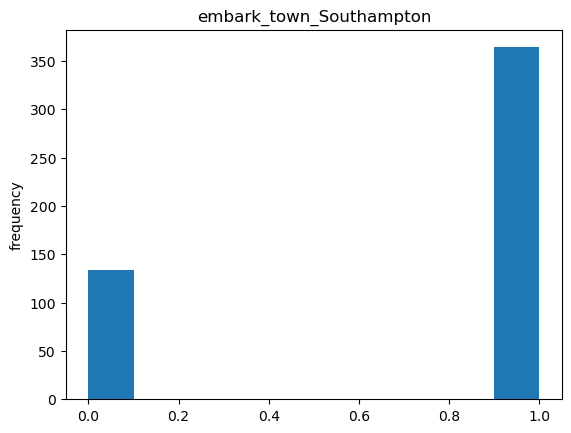

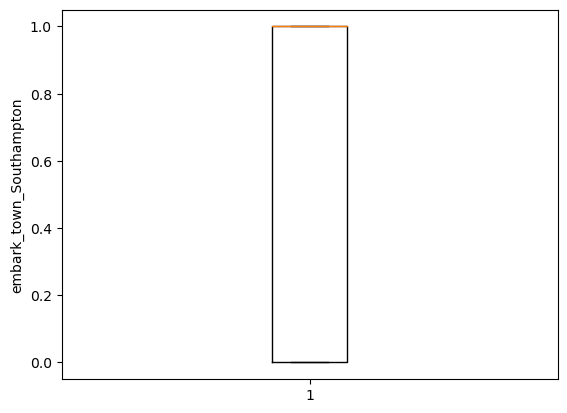

count    498.000000
mean       0.730924
std        0.443926
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: embark_town_Southampton, dtype: float64


In [42]:
for col in num_cols2:
    plt.hist(train2[col])
    plt.title(col)
    plt.ylabel('frequency')
    plt.show()
    
 # boxplot
    plt.boxplot(train2[col])
    plt.ylabel(col)
    plt.show()
    
    #stats
    print(train2[col].describe())

    

# bivariate stats

In [60]:
# Plots ( numeric X numeric )
'''
sns.scatterplot()
sns.heatmap()
sns.lineplot()
sns.lmplot()
sns.pairplot()
'''

In [ ]:
# Plots ( discrete x numeric)
'''
sns.swarmplot()
sns.violinplot()
sns.barplot()
sns.stripplot()
sns.boxenplot()
'''


In [ ]:
# Plots (discrete x discrete)
# sns.swarmplot()
# sns.countplot()
# if one categorical is a boolean, such as survived in the titanic case, we can set the binary target to the y axis and see proportions by using: sns.barplot(), sns.boxplot()


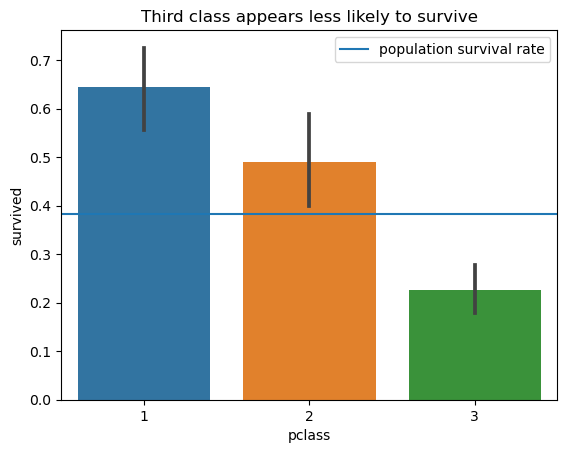

In [62]:
plt.title('Third class appears less likely to survive')
sns.barplot(x='pclass', y='survived', data=train2)
pop_survival_rate = train2.survived.mean()
plt.axhline(pop_survival_rate, label = 'population survival rate')
plt.legend()

In [68]:
alpha = 0.05
# H_o = "survival and class are independent"
# H_a = "there is a relationship between survival and class"

# set up a crosstab of observed values
observed = pd.crosstab(train2.survived, train2.pclass)
observed

pclass,1,2,3
survived,,,
0,44,51,212
1,80,49,62


In [69]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("reject the null hypothesis")
    print("there appears to be a relationship between survival and class")
else:
    print("fail to reject the null hypothesis that")

reject the null hypothesis
there appears to be a relationship between survival and class


# multivariate

In [ ]:
# barplot with survived on x and var on y

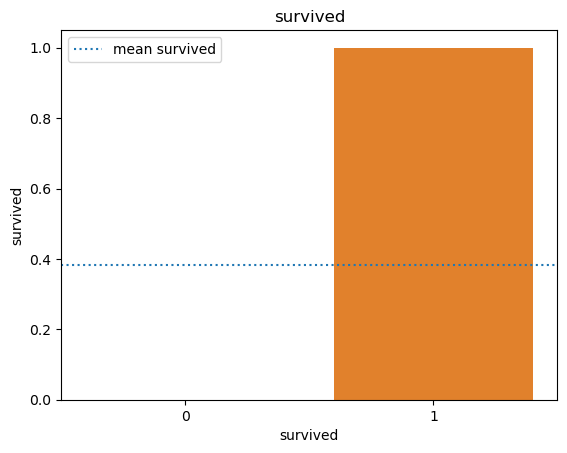

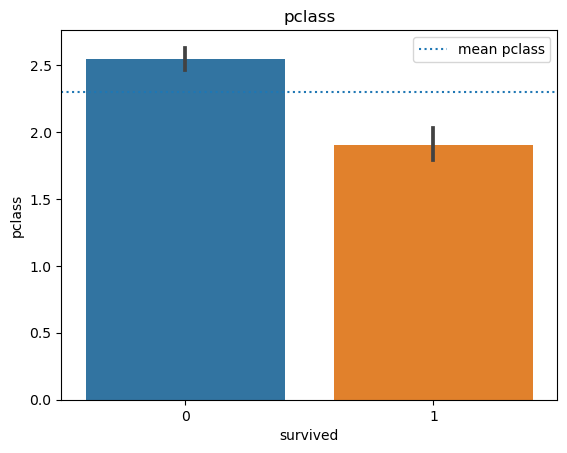

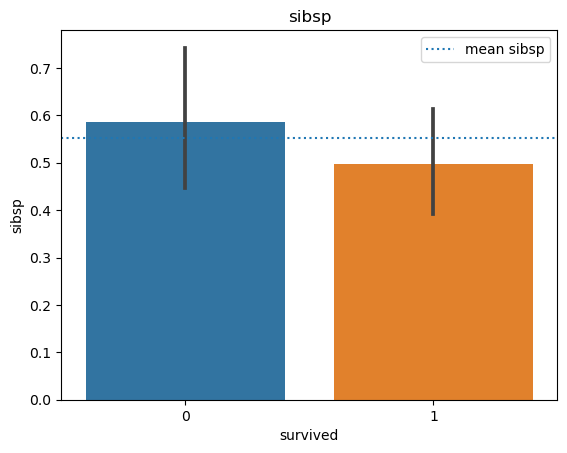

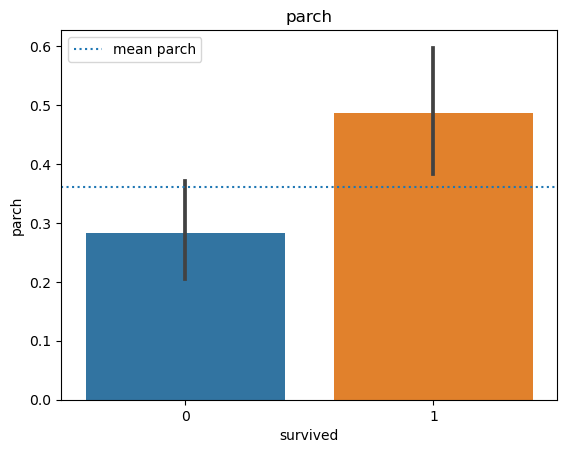

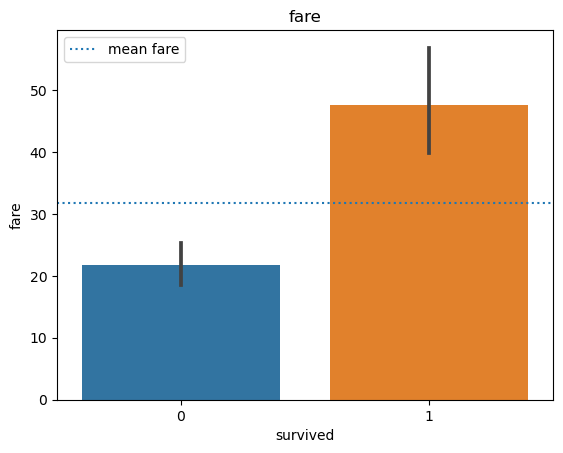

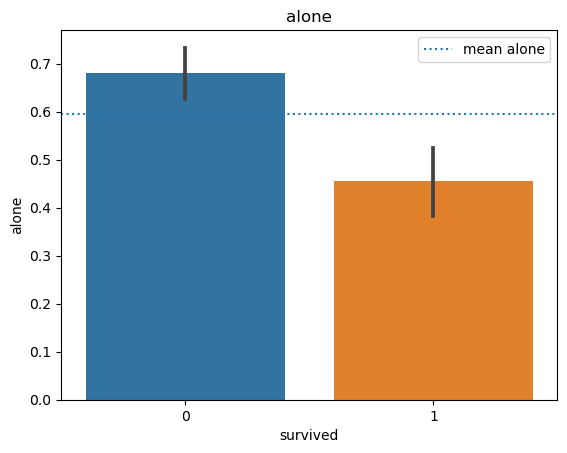

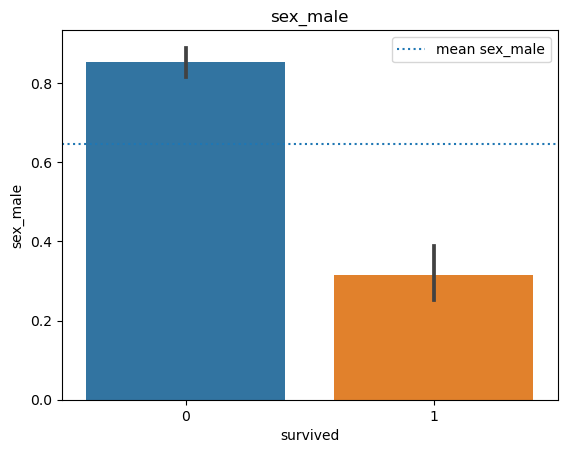

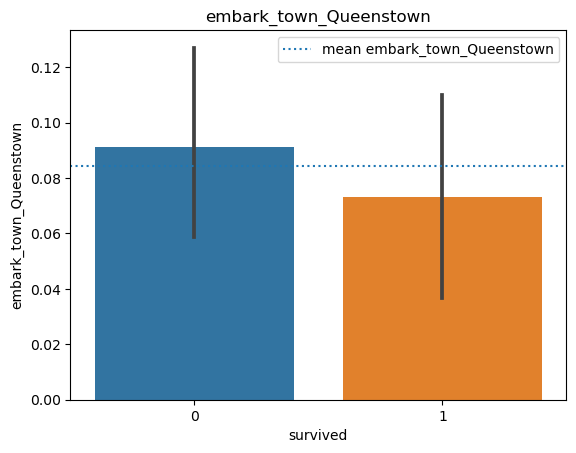

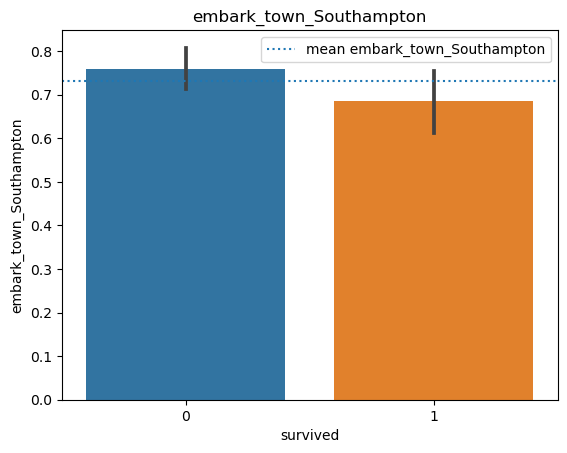

survived                                0           1
pclass                  count  307.000000  191.000000
                        mean     2.547231    1.905759
                        std      0.732230    0.859326
                        min      1.000000    1.000000
                        25%      2.000000    1.000000
...                                   ...         ...
embark_town_Southampton min      0.000000    0.000000
                        25%      1.000000    0.000000
                        50%      1.000000    1.000000
                        75%      1.000000    1.000000
                        max      1.000000    1.000000

[64 rows x 2 columns]

In [50]:
for col in num_cols2:
    sns.barplot(data = train2, x = 'survived', y =col)
    plt.title(col)
    
    overall_mean = train2[col].mean()
    plt.axhline(overall_mean, label = f'mean {col}', linestyle = "dotted")
    plt.legend()
    plt.show()
    
train2.groupby('survived').describe().T
    


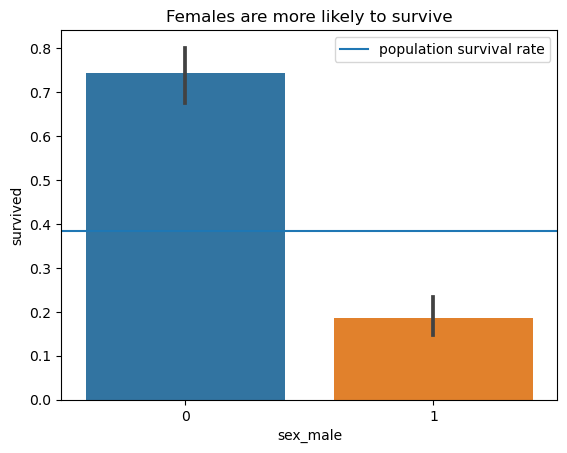

In [70]:
plt.title("Females are more likely to survive")
sns.barplot(x='sex_male', y='survived', data=train2)
pop_survival_rate = train2.survived.mean()
plt.axhline(pop_survival_rate, label='population survival rate')
plt.legend()
plt.show()

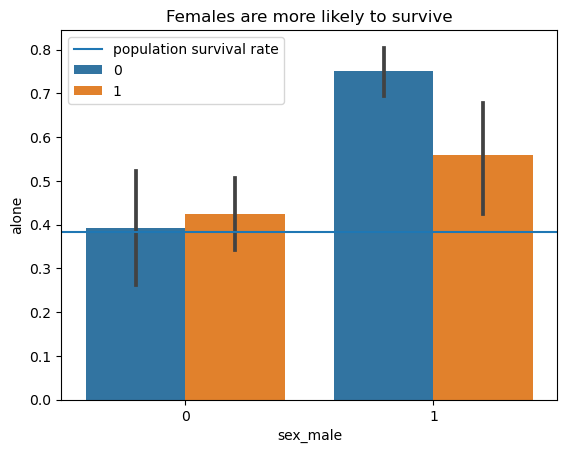

In [122]:
# does traveling alone based on sex have an impact
plt.title("")
sns.barplot(x='sex_male', y='alone',hue='survived', data=train2)
pop_survival_rate = train2.survived.mean()

plt.axhline(pop_survival_rate, label='population survival rate')
plt.legend()
plt.show()

# part 3

In [13]:
df = acquire.get_telco_data(acquire.get_connection)

In [14]:
clean_telco = prep_telco(df)

In [15]:
train3,validate3,test3= prepare.split_data(clean_telco,"churn")

In [12]:
#train3 = train3.drop(columns=[ 'gender','partner','dependents','phone_service',
#             'multiple_lines','online_security','online_backup',
 #            'device_protection','tech_support','streaming_tv',
 #            'streaming_movies','paperless_billing',
 #            'churn','contract_type','internet_service_type' ,
 #            'payment_type'])

In [16]:
train3.head(1)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
1021,1474-JUWSM,Female,0,Yes,No,58,Yes,Yes,Yes,No,...,1,1,0,1,0,0,0,0,1,0


(array([2897.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1046.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

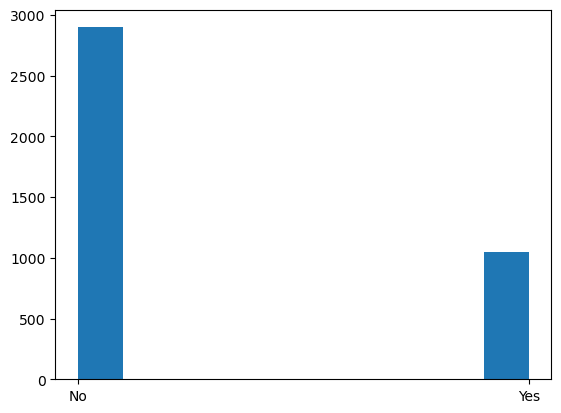

In [17]:

plt.hist(train3['churn'])

In [302]:
num_cols3 = train3.select_dtypes(include=['float64','int64'])

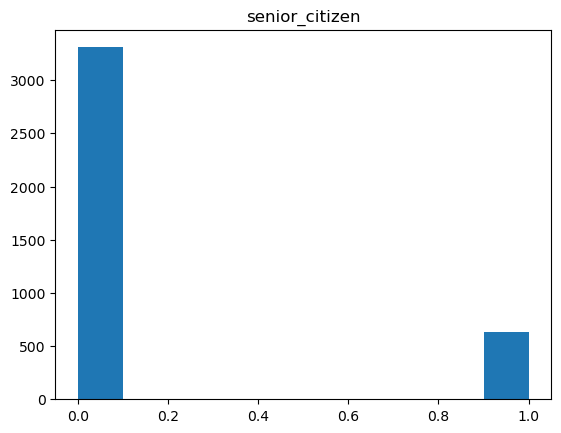

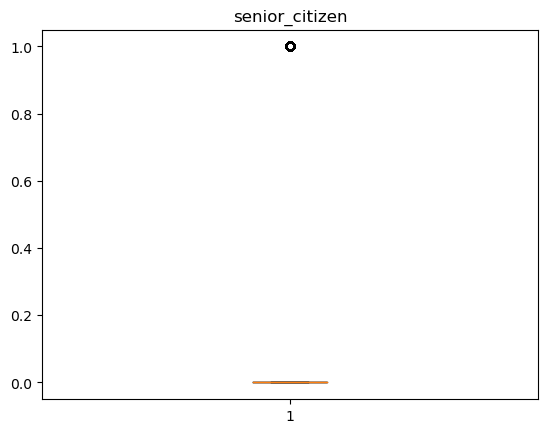

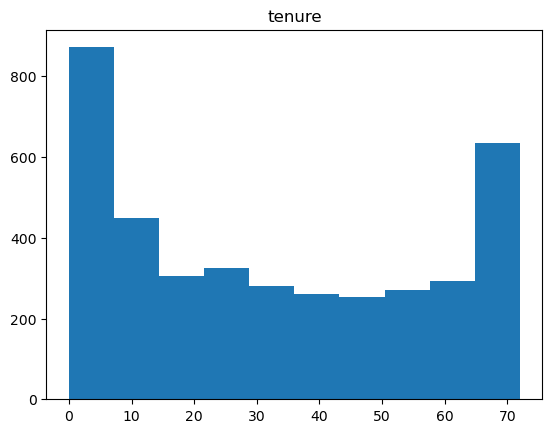

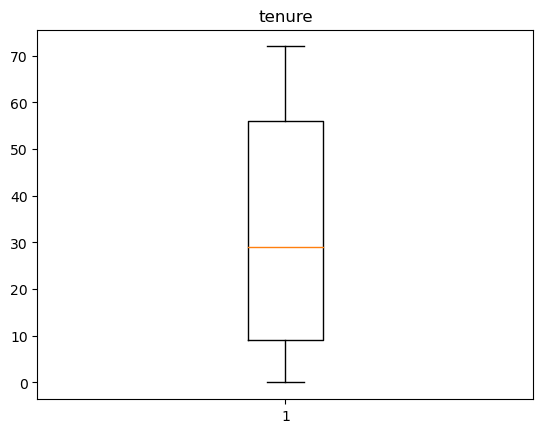

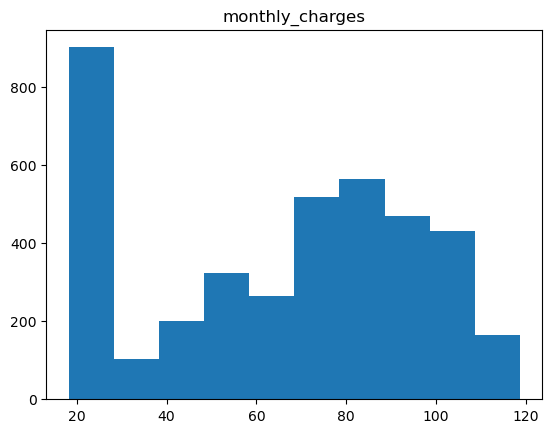

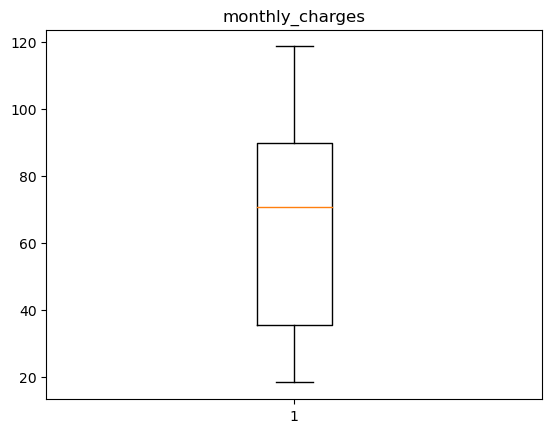

In [303]:
for col in num_cols3:
    plt.hist(train3[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train3[col])
    plt.title(col)
    plt.show()

In [ ]:
# we have a low amount of seniors

# churn in senior citizens

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


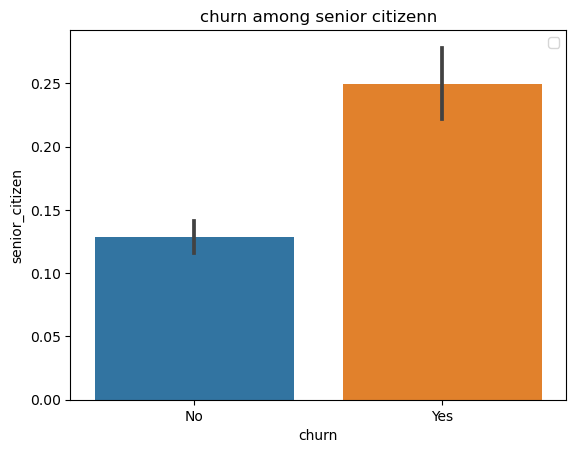

In [463]:
plt.title("churn among senior citizenn")

sns.barplot(x="churn", y="senior_citizen", data=train3)

plt.legend()
plt.show()


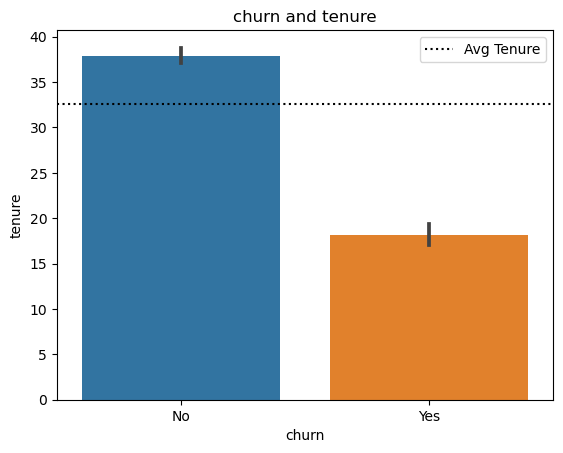

In [311]:
plt.title("churn and tenure")

sns.barplot(x="churn", y="tenure", data=train3)

avg_tenure = train3.tenure.mean()

plt.axhline(avg_tenure , label="Avg Tenure", color='black', linestyle='dotted')

plt.legend()
plt.show()


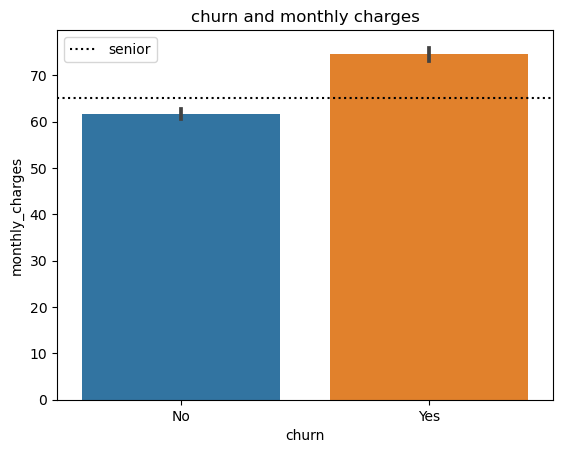

In [455]:
plt.title("churn and monthly charges")

sns.barplot(x="churn", y="monthly_charges", data=train3)
monthlyCharge = train3.monthly_charges.mean()

plt.axhline(monthlyCharge , label="senior", color='black', linestyle='dotted')

plt.legend()
plt.show()


TypeError: Neither the `x` nor `y` variable appears to be numeric.

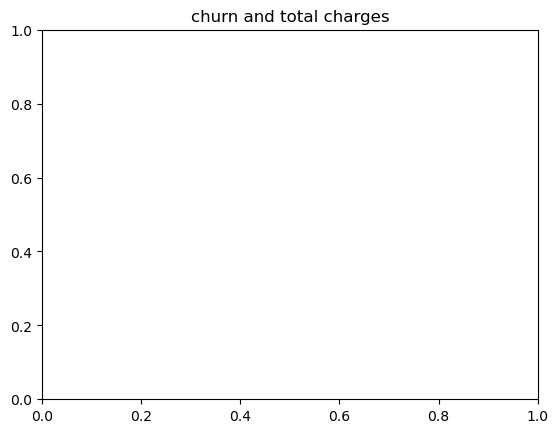

In [464]:
plt.title("churn and total charges")

sns.barplot(x="churn", y="total_charges", data=train3)
totalCharge = train3.total_charges.mean()

plt.axhline(monthlyCharge , label="senior", color='black', linestyle='dotted')

plt.legend()
plt.show()


In [456]:
train3 = train3.replace(' ',0)

In [457]:
train3 = train3['total_charges'b].astype('float')

In [ ]:
# Takeaway# 
'''
more seniors are churning than staying
youre more likely to stay the longer your tenure is
the people who are churning, on average has a higher monthly payment
'''

# multivariate stat

In [ ]:
# two numeric values by means of target

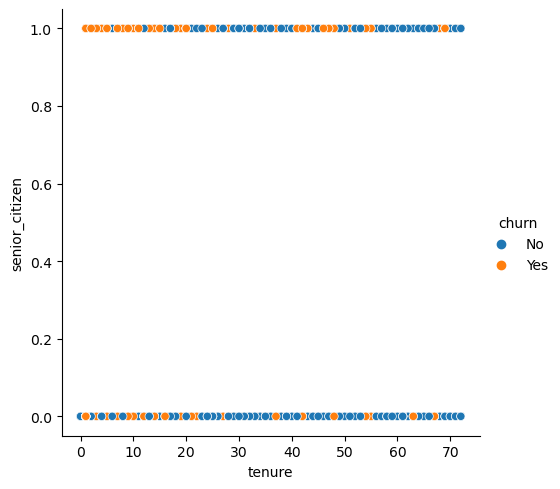

In [465]:
sns.relplot(data=train3, x = "tenure",y = 'senior_citizen',hue = "churn")

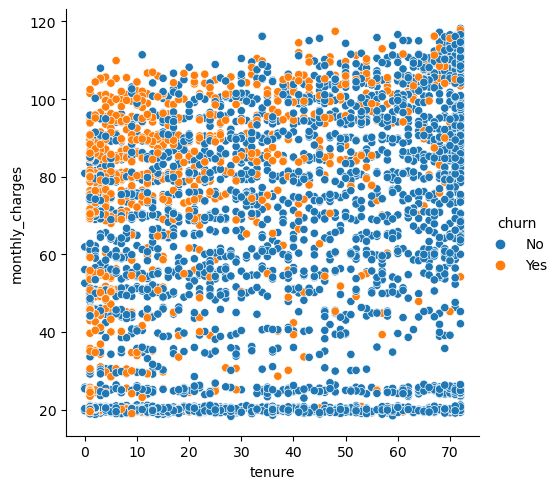

In [467]:
sns.relplot(data=train3, x = "tenure",y = 'monthly_charges',hue = "churn")